<a href="https://colab.research.google.com/github/sauravrox/sentiment-analysis/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import tkinter as tk
from tkinter import simpledialog
import tweepy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import tree
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
!pip install emoji
import emoji
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import pickle
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib
# print(sklearn.__version__)
matplotlib.use('Agg')

nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 133kB 8.3MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
# Local directory
Reviewdata = pd.read_csv('/content/drive/MyDrive/thesis/train.csv', encoding='latin-1')
Reviewdata = Reviewdata.dropna()
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])
# print(Reviewdata['sentiment'].value_counts())
Reviewdata['sentiment'].value_counts().sort_values().plot(kind = 'barh')
plt.show() 

In [5]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.selected_text.apply(cleaned))
Reviewdata.head(10)

,selected_text,sentiment,cleaned_description
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,switchfoot Awww thats a bummer You shoulda ...
1,is upset that he can't update his Facebook by ...,negative,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,negative,Kenichan I dived many times for the ball Manag...
3,my whole body feels itchy and like its on fire,negative,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",negative,nationwideclass no its not behaving at all im ...
5,@Kwesidei not the whole crew,negative,Kwesidei not the whole crew
6,Need a hug,negative,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,LOLTrish hey long time no see Yes Rains a bit...
8,@Tatiana_K nope they didn't have it,negative,TatianaK nope they didnt have it
9,@twittera que me muera ?,negative,twittera que me muera


In [6]:
def extract_emojis(s):
	tweet = emoji.demojize(s)
	tweet = tweet.replace(":"," ")
	tweet = ' '.join(tweet.split())
	return tweet

# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned))
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])
# Reviewdata['sentiment'].plot(kind="bar")

In [7]:
Reviewdata['sentiment'] = LabelEncoder().fit_transform(Reviewdata['sentiment'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.25, random_state = 225)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()

from sklearn.pipeline import Pipeline

IV_train, IV_test, DV_train, DV_test = model_selection.train_test_split(Independent_var, Dependent_var, test_size=0.25, random_state=109)

In [9]:
dt_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
max_features=None, max_leaf_nodes=None,
min_impurity_split=1e-07, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
presort=False, random_state=None, splitter='best')

dt_model = Pipeline([('vectorizer',tvec),('classifier',dt_clf)])

In [10]:
# Train Decision Tree Classifer
dt_model.fit(IV_train, DV_train)
filename = 'dt_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))

predictions = dt_model.predict(IV_test)
print("DT Confusion Matrix: ", confusion_matrix(predictions, DV_test)) 

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DT Confusion Matrix:  [[4724  884 2187]
 [1541 6628 1605]
 [2069  794 4556]]


In [11]:
print ("DT Accuracy : ", 
accuracy_score(predictions,DV_test)*100) 

DT Accuracy :  63.662558027853365


In [12]:
print("DT Report : ", 
classification_report(predictions, DV_test))

DT Report :                precision    recall  f1-score   support

           0       0.57      0.61      0.59      7795
           1       0.80      0.68      0.73      9774
           2       0.55      0.61      0.58      7419

    accuracy                           0.64     24988
   macro avg       0.64      0.63      0.63     24988
weighted avg       0.65      0.64      0.64     24988



In [13]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
results = model_selection.cross_val_score(dt_model, Independent_var, Dependent_var, cv=kfold, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It wi

In [14]:
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())*100)

Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0.657 (0.004)Accuracy: 0

In [15]:
consumerKey = 'Y76b838VJixCT9coY5aVaFWRv'
consumerSecret = 'MWQiIs4rzY8zKySusGf6hPiLU8e3vAbJNV02lKi3FLhdfirUmT'
accessToken = '1266387212150566913-HS7RCIKe86EsZFmMVMjeOF3SWlvCY5'
accessTokenSecret = 'AnngLumAWhaKXw1avMXR8eWu1GUllVMrML1zQKy1poLBP'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

user_data = '%23'+'biden'

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")
posts = list()
for tweet in tweepy.Cursor(api.search, q=user_data, lang='en').items(500):
	posts.append(tweet.text)

In [16]:
lemmatiser = WordNetLemmatizer()
list_posts = list()
for p in posts:
	temp = re.sub(' +', ' ', p).lower()
	temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
	temp = extract_emojis(temp)
	temp = text_clean(temp)
	list_posts.append(temp)
# print(list_posts)
df = pd.DataFrame([list_post for list_post in list_posts], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(text_clean)


In [17]:
# Create a function to get the polarity
def getPolarity(text):
	example = [text]
	result = dt_model.predict(example)
	if result==1:
		result = 'neutral'
	if result==2:
		result = 'positive'
	if result==0:
		result = 'negative'
	return result

# # Create two new columns 'Subjectivity' & 'Polarity'
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [18]:
df

,Tweets,Polarity
0,rt russia abandoned usd use gold transaction ...,positive
1,rt https the page brave trump racism capit...,positive
2,rt https the page brave trump racism capit...,positive
3,oilindustry hit hard pandemic well trade war r...,positive
4,rt https the page brave trump racism capit...,positive
...,...,...
495,rt gordongchang prez biden responsible colonia...,positive
496,rt atparasiliti two best amberinzaman asliaydi...,positive
497,https domainname sale the yacht charter mar...,positive
498,rt emolclause katiebowillcnn jeremyherb marsha...,neutral


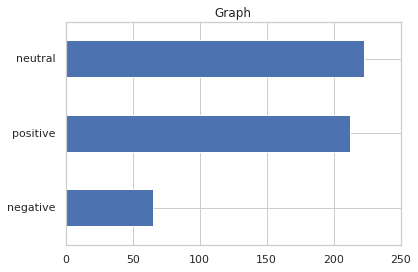

In [25]:
# use to set style of background of plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

sns.set(style="whitegrid")
 
# loading data-set
dtdata = df
keys=['Count','Percentage']
df['Polarity'].value_counts().sort_values().plot(kind = 'barh')
# sns.stripplot(x=df['Tweets'], y=df['Polarity'], data=iris,jitter=True)

plt.title('Graph')
 
# function to show plot
plt.show()

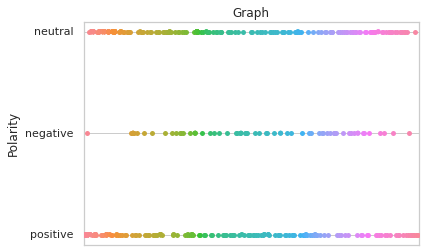

In [27]:
sn = sns.stripplot(x='Tweets', y=df['Polarity'], data=dtdata,jitter=True)
sn.set(xticklabels=[])
sn.set(xlabel=None)

plt.title('Graph')
 
# function to show plot
plt.show(sns)

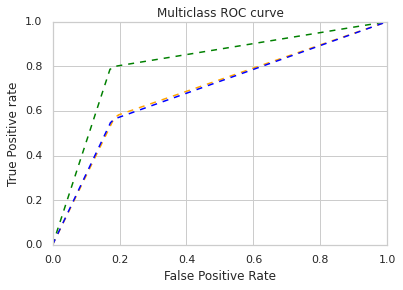

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob_pred = dt_model.predict_proba(IV_test)

#roc auc score
roc_auc_score(DV_test, y_prob_pred, multi_class='ovo', average='weighted')

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(DV_test, y_prob_pred[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
# plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);
